In [111]:
# required package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import logging

In [112]:
# add logging
logging.basicConfig(filename='output.log', level=logging.INFO, format='%(asctime)s - %(message)s')

# Preprocessing Data
The following are the required pre-processing steps. Of course, you can add more as per your requirements. 

- Loading the data into Pandas DataFrame object. Remember to use public URLs to read the file. 

- Examining data for consistency: Check for null values, missing data, and any data inconsistency and handle them before proceeding forward. 

- Examining attributes and target variable(s): Be sure you clearly understand each of the attributes and the target variable. Examine the various attributes and convert any categorical ones to numerical ones, if needed. Obtain and output summary of the attributes. Are the attributes normally distributed? If not, what could be the reason? 

- Standardize and normalize the attributes. 

- Find how the attributes are correlated to each other and the target variable. Perform numerical and visual analysis and output plots and results. 

- Identify a few important attributes and proceed forward. Do not use all attributes blindly.

In [113]:
# read dataset from csv
df = pd.read_csv("https://raw.githubusercontent.com/uy-seng/cs4372/refs/heads/main/assignment-2/lung_cancer_survey.csv")

In [114]:
# check for null
print("NULL CHECK")
df.isnull().sum()

NULL CHECK


GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [115]:
# check for missing value
print("MISSING VALUE CHECK")
df.isna().sum()

MISSING VALUE CHECK


GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [116]:
# check for duplicates
print("DUPLICATE CHECK")
df[df.duplicated()]

DUPLICATE CHECK


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
99,M,56,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
100,M,58,2,1,1,1,1,1,2,2,2,2,1,1,1,YES
117,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
199,F,55,2,1,1,2,2,2,2,2,2,1,1,2,2,YES
212,M,58,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
223,M,63,2,2,2,1,2,2,2,2,1,1,2,1,1,YES
256,M,60,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
275,M,64,2,2,2,2,2,1,1,1,2,1,1,2,2,YES
284,M,58,2,2,2,2,2,1,1,1,2,1,1,2,2,YES
285,F,58,2,2,2,2,1,2,1,1,1,2,2,2,1,YES


In [117]:
# drop duplicate from dataset
df.drop_duplicates(inplace=True)

In [118]:
df.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

In [119]:
# strip trailing space and leading space in column name
df.columns = df.columns.str.strip()

In [120]:
# format column names
df.columns = df.columns.str.replace(' ', '_')

In [121]:
# remove hidden character in column names
df.columns = df.columns.str.replace(r'\xa0', '', regex=True)

In [122]:
# check distribution of gender
df["GENDER"].value_counts()

GENDER
M    142
F    134
Name: count, dtype: int64

In [123]:
# convert categorical to numerical for gender
df.replace({'M': 1, 'F': 2}, inplace=True)

/var/folders/jw/1n94bt095gvd97f9yxx9w8n80000gn/T/ipykernel_1803/1711233472.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'M': 1, 'F': 2}, inplace=True)


In [124]:
# check for distribution of lung cancer
df["LUNG_CANCER"].value_counts()

LUNG_CANCER
YES    238
NO      38
Name: count, dtype: int64

In [125]:
# convert categorical to numerical for lung cancer
df.replace({'YES': 1, 'NO': 0}, inplace=True)

/var/folders/jw/1n94bt095gvd97f9yxx9w8n80000gn/T/ipykernel_1803/1318794018.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'YES': 1, 'NO': 0}, inplace=True)


In [126]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,2,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,2,59,1,2,2,2,1,1,2,2,1,2,1,2,1,1
280,2,59,2,1,1,1,2,2,2,1,1,1,2,1,1,0
281,1,55,2,1,1,1,1,2,2,1,1,1,2,1,2,0
282,1,46,1,2,2,1,1,1,1,1,1,1,1,2,2,0


In [127]:
df.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,1.485507,62.909420,1.543478,1.576087,1.496377,1.507246,1.521739,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971,0.862319
std,0.500698,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530,0.345191
min,1.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,2.000000,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,2.000000,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


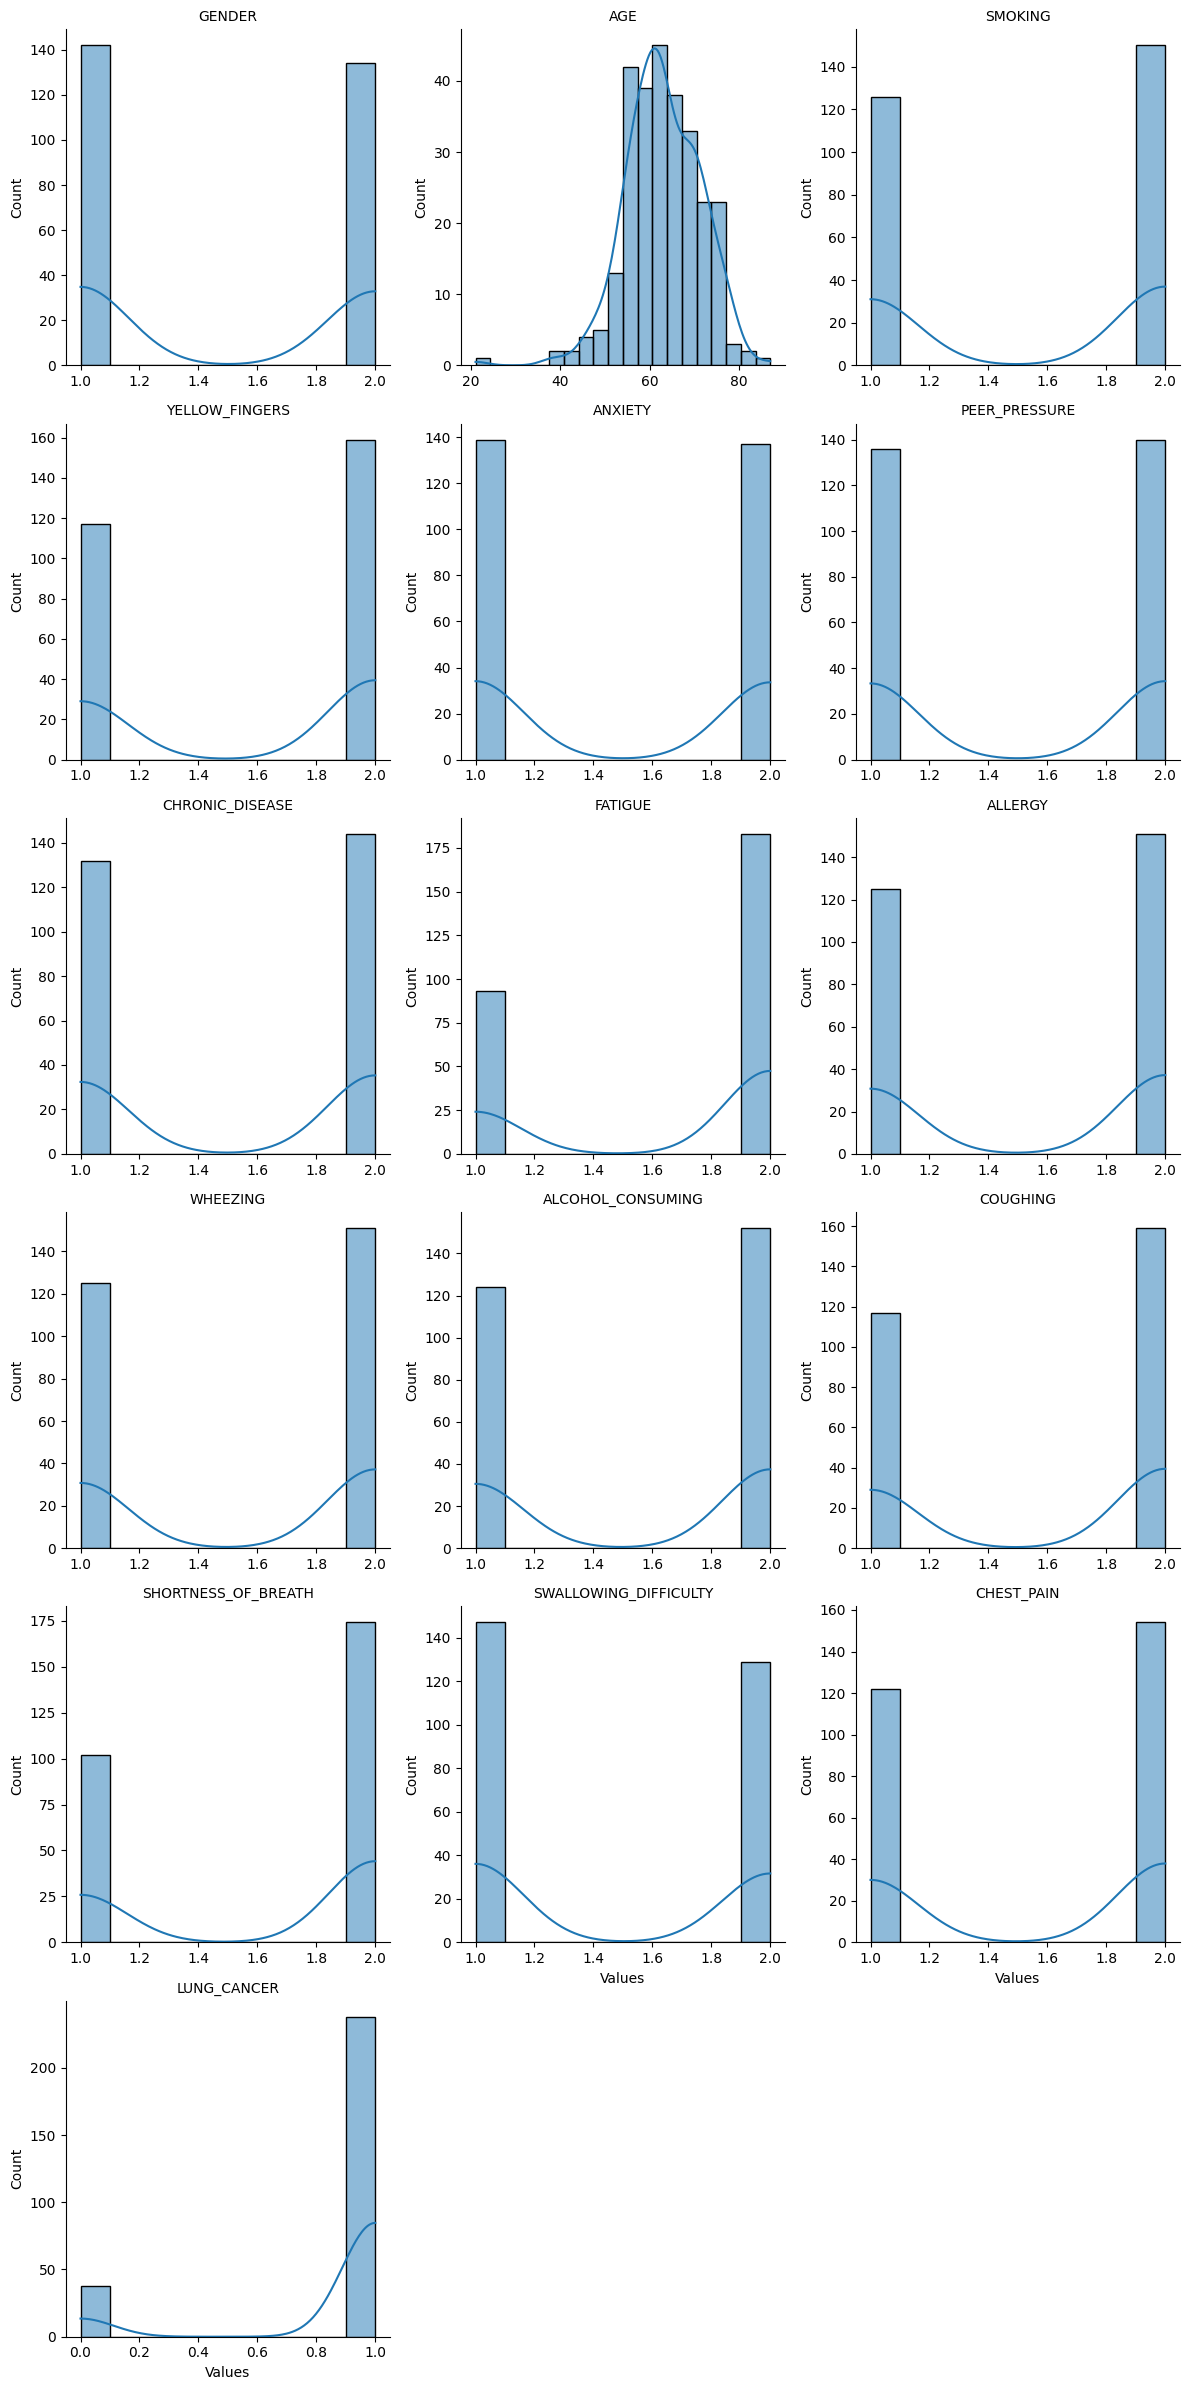

In [128]:
# Select only numerical columns for distribution plots
numerical_columns = df.select_dtypes(include='number').columns

# Create a long-form DataFrame suitable for FacetGrid
melted_df = df[numerical_columns].melt(var_name='Columns', value_name='Values')

# Create a grid of histograms using Seaborn's FacetGrid
g = sns.FacetGrid(melted_df, col='Columns', col_wrap=3, height=4, sharex=False, sharey=False)
g.map(sns.histplot, 'Values', kde=True)

# Adjust layout and show
g.set_titles("{col_name}")
plt.tight_layout()
plt.show()

In [129]:
df.corr()["LUNG_CANCER"]

GENDER                  -0.053666
AGE                      0.106305
SMOKING                  0.034878
YELLOW_FINGERS           0.189192
ANXIETY                  0.144322
PEER_PRESSURE            0.195086
CHRONIC_DISEASE          0.143692
FATIGUE                  0.160078
ALLERGY                  0.333552
WHEEZING                 0.249054
ALCOHOL_CONSUMING        0.294422
COUGHING                 0.253027
SHORTNESS_OF_BREATH      0.064407
SWALLOWING_DIFFICULTY    0.268940
CHEST_PAIN               0.194856
LUNG_CANCER              1.000000
Name: LUNG_CANCER, dtype: float64

In [130]:
df["LUNG_CANCER"].value_counts()

LUNG_CANCER
1    238
0     38
Name: count, dtype: int64

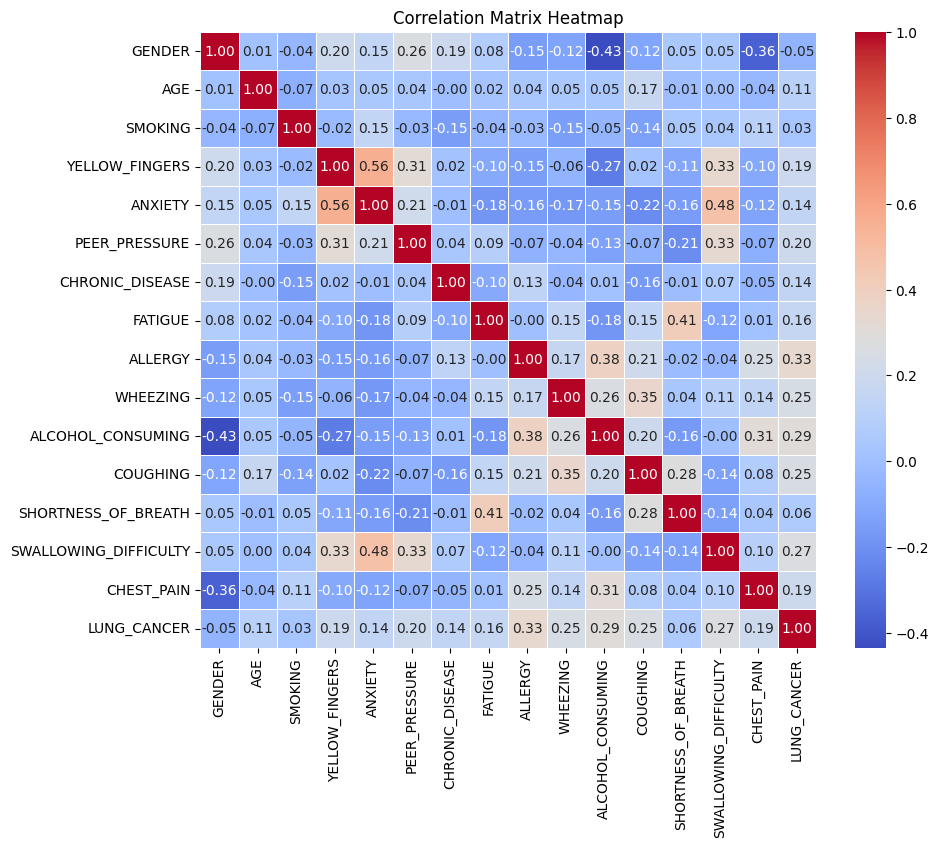

In [131]:
# TODO: show heatmap
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))
# Draw the heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True, linewidths=.5)
# Add title to the heatmap
plt.title('Correlation Matrix Heatmap')
# Show the heatmap
plt.show()

# Tree Model Building 

In this section, you will perform data pre-processing, loading, model creation and parameter tuning using GridSearchCV and results analysis. You will need to create the following tree models: 

1. Plain Decision Tree Classifier / Regressor 

2. Random Forest Classifier / Regressor 

3. Adaboot Classifier / Regressor 

4. XGBoost Classifier / Regressor

In [132]:
selected_features = ["AGE", "YELLOW_FINGERS", "ANXIETY", "PEER_PRESSURE", "CHRONIC_DISEASE", "FATIGUE", "ALLERGY", "WHEEZING", "ALCOHOL_CONSUMING", "COUGHING", "SWALLOWING_DIFFICULTY", "CHEST_PAIN"]
target = ["LUNG_CANCER"]

X = df[selected_features]
y = df[target]

## 1. Plain Decision Tree Classifier

In [133]:
# using hold out method
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [134]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from itertools import product

# Create Decision Tree classifer object
# no stopping criteria, let the tree grow as much as it want
# Testing several parameters
max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
criterions = ["gini", "entropy"]

best_accuracy = 0
best_max_depth = 0
best_model_report = None

logging.info("=== Plain Decision Tree Classifier (using holdout method) ===")
for max_depth, criterion in product(max_depths, criterions):
    clf = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, min_impurity_decrease=0.01, class_weight='balanced')
    # Train Decision Tree Classifer
    clf = clf.fit(X_train,y_train)
    #Predict the response for test dataset
    predictions = clf.predict(X_test)
    predicted_probas = clf.predict_proba(X_test)
    accuracy = accuracy_score(y_test, predictions)
    
    logging.info(f"Max Depth: {max_depth} - Criterion: {criterion} - Accuracy: {accuracy}")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_max_depth = max_depth
        best_model_report = classification_report(y_test, predictions)
        
print(f"Best accuracy: {best_accuracy}")
print(f"Best max_depth: {best_max_depth}")
print("Best model report:")
print(best_model_report)

Best accuracy: 0.8433734939759037
Best max_depth: 5
Best model report:
              precision    recall  f1-score   support

           0       0.47      0.75      0.58        12
           1       0.95      0.86      0.90        71

    accuracy                           0.84        83
   macro avg       0.71      0.80      0.74        83
weighted avg       0.88      0.84      0.86        83



In [135]:
%pip install graphviz


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


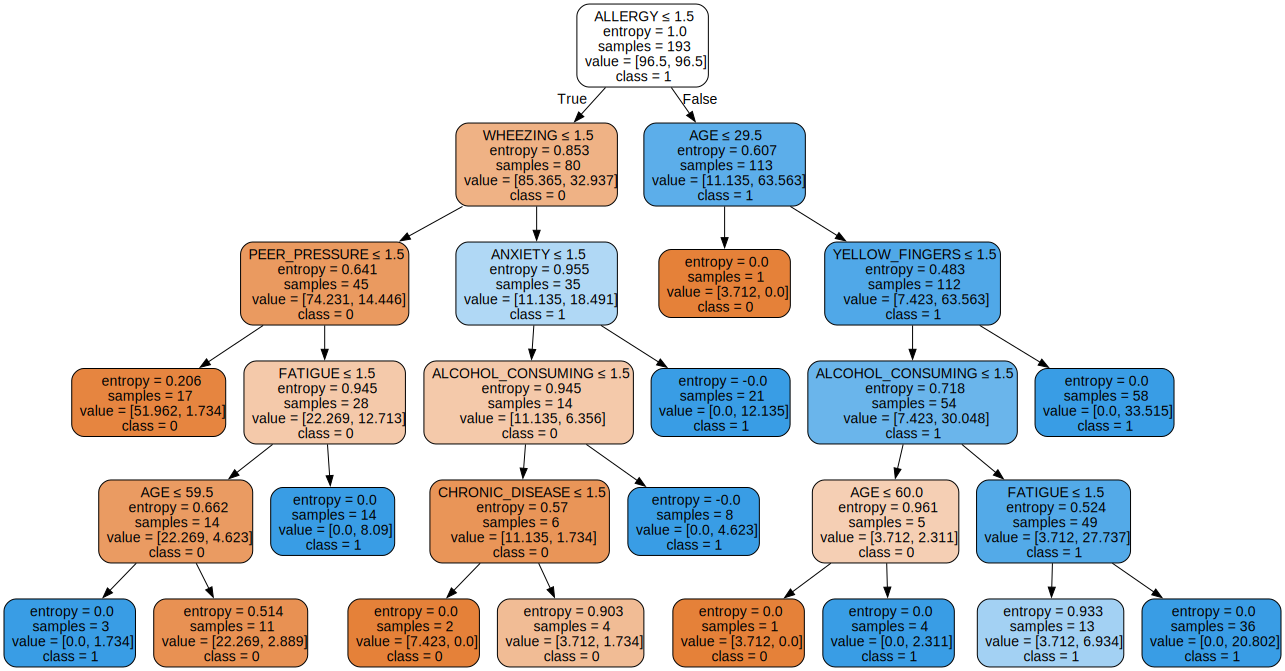

In [136]:
import graphviz
from sklearn import tree
clf = DecisionTreeClassifier(max_depth=best_max_depth, criterion=best_criterion, min_impurity_decrease=0.01, class_weight='balanced')
clf = clf.fit(X_train,y_train)
dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names = selected_features, class_names=['0','1'],
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [145]:
# use cross validation
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from itertools import product
import numpy as np

# Parameters to test
max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
criterions = ["gini", "entropy"]

best_accuracy = 0
best_max_depth = 0
best_criterion = None

# Initialize stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

logging.info("=== Plain Decision Tree Classifier (using cross-validation method) ===")
# Iterate over all combinations of max_depths and criterions
for max_depth, criterion in product(max_depths, criterions):
    clf = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, min_impurity_decrease=0.01, class_weight='balanced')
    
    # Perform cross-validation and calculate the mean accuracy
    cv_scores = cross_val_score(clf, X, y, cv=skf, scoring='accuracy')
    mean_accuracy = np.mean(cv_scores)
    
    # Logging information
    logging.info(f"Max Depth: {max_depth} - Criterion: {criterion} - Mean CV Accuracy: {mean_accuracy}")
    
    # Check if this is the best model so far
    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_max_depth = max_depth
        best_criterion = criterion

# Train the best model on the entire training data and get the classification report
best_clf = DecisionTreeClassifier(max_depth=best_max_depth, criterion=best_criterion, min_impurity_decrease=0.01)
best_clf.fit(X_train, y_train)
best_predictions = best_clf.predict(X_test)
best_model_report = classification_report(y_test, best_predictions)

# Print the results
print(f"Best accuracy: {best_accuracy}")
print(f"Best max_depth: {best_max_depth}")
print(f"Best criterion: {best_criterion}")
print("Best model report:")
print(best_model_report)


Best accuracy: 0.8769480519480519
Best max_depth: 9
Best criterion: entropy
Best model report:
              precision    recall  f1-score   support

           0       0.47      0.58      0.52        12
           1       0.93      0.89      0.91        71

    accuracy                           0.84        83
   macro avg       0.70      0.74      0.71        83
weighted avg       0.86      0.84      0.85        83



AUC Score: 0.80


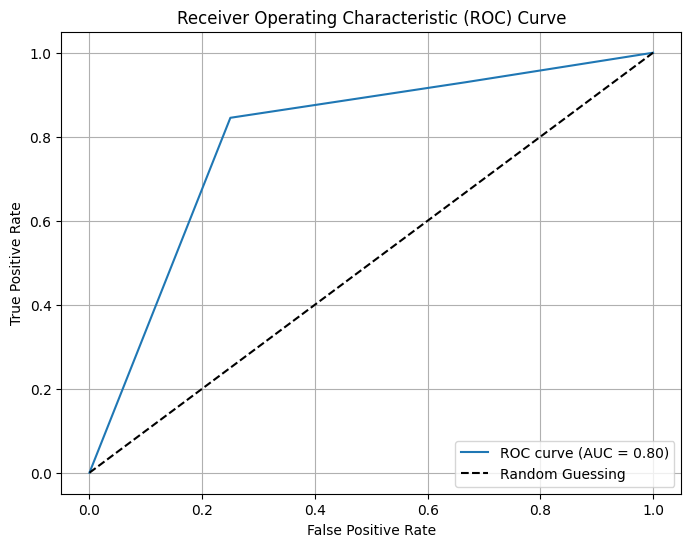

In [149]:
# get ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

clf = DecisionTreeClassifier(max_depth=best_max_depth, criterion=best_criterion, min_impurity_decrease=0.01, class_weight='balanced')
clf.fit(X_train, y_train)

# Step 1: Obtain predicted probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Step 2: Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Step 3: Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"AUC Score: {auc_score:.2f}")

# Step 4: Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Average Precision Score: 0.94
Precision-Recall AUC: 0.97


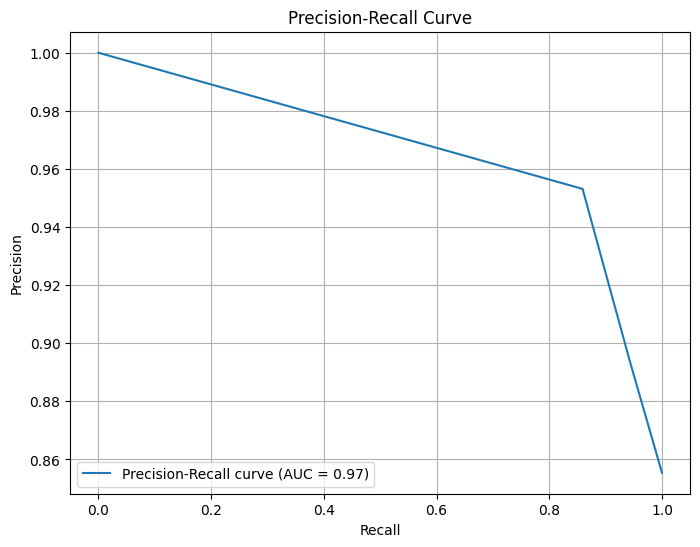

In [150]:
# Get precision-recall curve
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
import matplotlib.pyplot as plt



clf = DecisionTreeClassifier(max_depth=best_max_depth, criterion=best_criterion, min_impurity_decrease=0.01, class_weight='balanced')
clf.fit(X_train, y_train)
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Step 1: Calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Step 2: Calculate average precision score (optional, for reference)
avg_precision = average_precision_score(y_test, y_pred_prob)
print(f'Average Precision Score: {avg_precision:.2f}')

# Step 3: Calculate the area under the precision-recall curve (optional)
pr_auc = auc(recall, precision)
print(f'Precision-Recall AUC: {pr_auc:.2f}')

# Step 4: Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid()
plt.show()


## 2. Random Forest Classifier

In [151]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from itertools import product

# Create Decision Tree classifer object
# no stopping criteria, let the tree grow as much as it want
# Testing several parameters
max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# from previous we know that criterion doesn't matter
# criterions = ["gini", "entropy"]
max_leaf_nodes = [2, 3, 4, 5, 6, 7, 8, 9, 10]


best_accuracy = 0
best_max_depth = 0
best_max_leaf_node = 0
best_model_report = None

logging.info("=== Random Forest Classifier (using holdout method) ===")
for max_depth, max_leaf_node in product(max_depths, max_leaf_nodes):
    clf = RandomForestClassifier(max_depth=max_depth, max_leaf_nodes=max_leaf_node, min_impurity_decrease=0.01, class_weight='balanced')
    # Train Decision Tree Classifer
    clf = clf.fit(X_train,y_train)
    #Predict the response for test dataset
    predictions = clf.predict(X_test)
    predicted_probas = clf.predict_proba(X_test)
    accuracy = accuracy_score(y_test, predictions)
    
    logging.info(f"Max Depth: {max_depth} - Max Leaf Nodes: {max_leaf_node} - Accuracy: {accuracy}")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_max_depth = max_depth
        best_model_report = classification_report(y_test, predictions)
        best_max_leaf_node = max_leaf_node
        
print(f"Best accuracy: {best_accuracy}")
print(f"Best max_depth: {best_max_depth}")
print(f"Best max_leaf_node: {best_max_leaf_node}")
print("Best model report:")
print(best_model_report)

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

Best accuracy: 0.8795180722891566
Best max_depth: 4
Best max_leaf_node: 9
Best model report:
              precision    recall  f1-score   support

           0       0.56      0.75      0.64        12
           1       0.96      0.90      0.93        71

    accuracy                           0.88        83
   macro avg       0.76      0.83      0.79        83
weighted avg       0.90      0.88      0.89        83



/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [152]:
# use cross validation
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from itertools import product
import numpy as np

# Create Decision Tree classifer object
# no stopping criteria, let the tree grow as much as it want
# Testing several parameters
max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# from previous we know that criterion doesn't matter
# criterions = ["gini", "entropy"]
max_leaf_nodes = [2, 3, 4, 5, 6, 7, 8, 9, 10]

best_accuracy = 0
best_max_depth = 0
best_max_leaf_node = 0

# Initialize stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

logging.info("=== Random Forest Classifier (using cross-validation method) ===")
# Iterate over all combinations of max_depths and criterions
for max_depth, criterion in product(max_depths, criterions):
    clf = RandomForestClassifier(max_depth=max_depth, max_leaf_nodes=max_leaf_node, min_impurity_decrease=0.01, class_weight='balanced')
    
    # Perform cross-validation and calculate the mean accuracy
    cv_scores = cross_val_score(clf, X, y, cv=skf, scoring='accuracy')
    mean_accuracy = np.mean(cv_scores)
    
    # Logging information
    logging.info(f"Max Depth: {max_depth} - Max Leaf Nodes: {max_leaf_node} - Accuracy: {mean_accuracy}")
    
    # Check if this is the best model so far
    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_max_depth = max_depth
        best_max_leaf_node = max_leaf_node

# Train the best model on the entire training data and get the classification report
best_clf = RandomForestClassifier(max_depth=best_max_depth, max_leaf_nodes=best_max_leaf_node, min_impurity_decrease=0.01, class_weight='balanced')
best_clf.fit(X_train, y_train)
best_predictions = best_clf.predict(X_test)
best_model_report = classification_report(y_test, best_predictions)

# Print the results
print(f"Best accuracy: {best_accuracy}")
print(f"Best max_depth: {best_max_depth}")
print(f"Best max_leaf_nodes: {best_max_leaf_node}")
print("Best model report:")
print(best_model_report)

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

Best accuracy: 0.916948051948052
Best max_depth: 8
Best max_leaf_nodes: 10
Best model report:
              precision    recall  f1-score   support

           0       0.50      0.58      0.54        12
           1       0.93      0.90      0.91        71

    accuracy                           0.86        83
   macro avg       0.71      0.74      0.73        83
weighted avg       0.87      0.86      0.86        83



/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


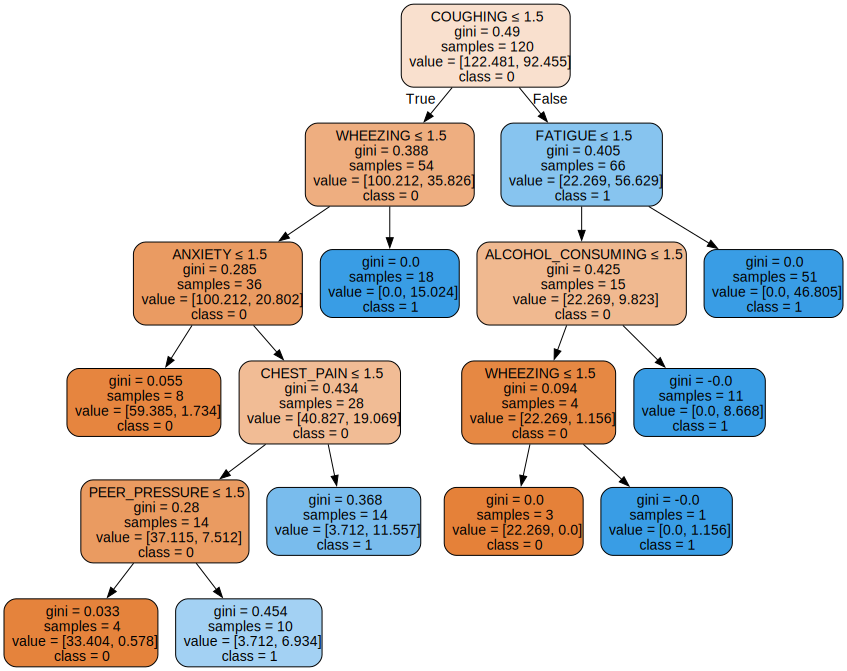

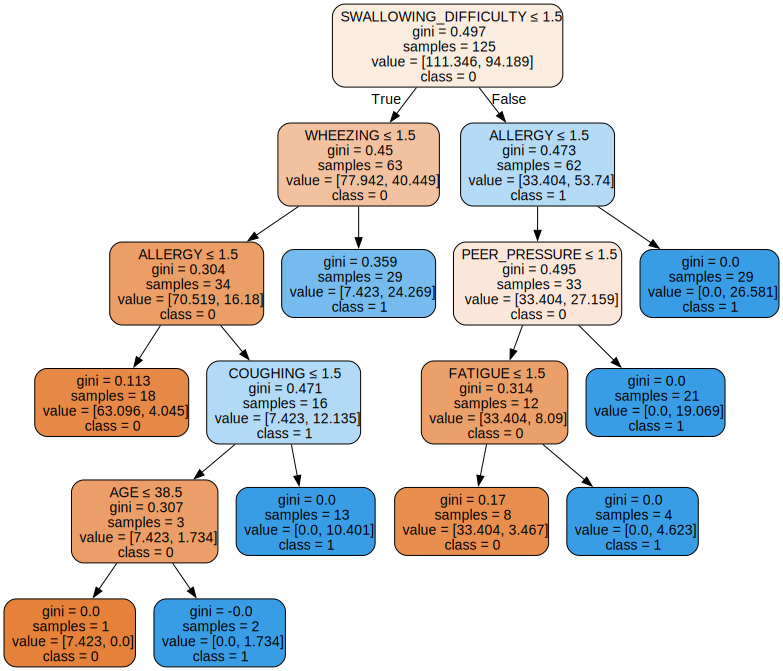

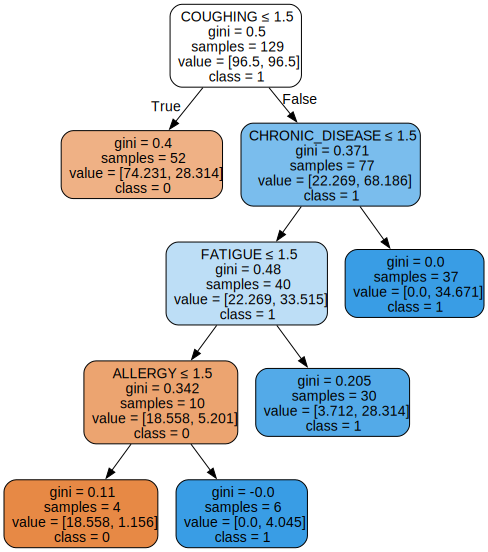

In [154]:
import graphviz
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Assuming 'best_max_depth', 'best_max_leaf_node', 'X_train', and 'y_train' are defined

# Train the Random Forest model
clf = RandomForestClassifier(max_depth=best_max_depth, max_leaf_nodes=best_max_leaf_node, 
                             min_impurity_decrease=0.01, class_weight='balanced')
clf = clf.fit(X_train, y_train)

for i in range(3):

    # Select a single tree from the Random Forest to visualize
    # You can select the first tree in the ensemble, for example:
    estimator = clf.estimators_[i]

    # Export the selected tree as a dot file
    dot_data = tree.export_graphviz(estimator, out_file=None,
                                    feature_names=selected_features, 
                                    class_names=['0', '1'],
                                    filled=True, rounded=True,
                                    special_characters=True)

    # Create a graph from the dot data
    graph = graphviz.Source(dot_data)
    display(graph)

AUC Score: 0.89


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


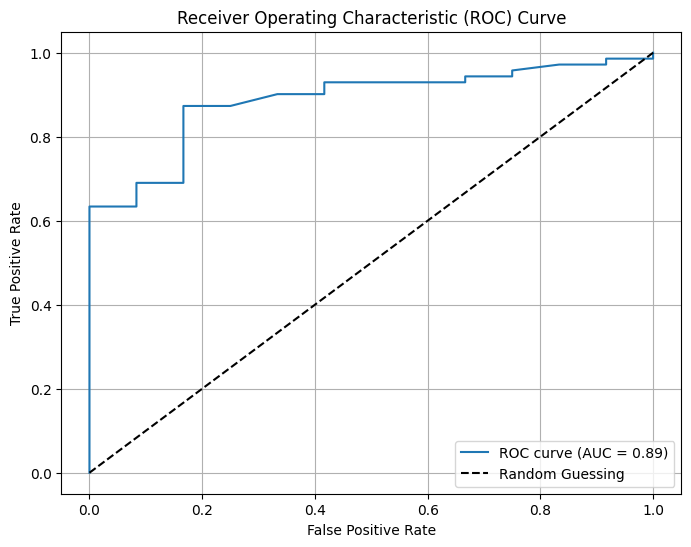

In [155]:
# insert roc curve
# get ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

clf = RandomForestClassifier(max_depth=best_max_depth, max_leaf_nodes=best_max_leaf_node, 
                             min_impurity_decrease=0.01, class_weight='balanced')
clf.fit(X_train, y_train)

# Step 1: Obtain predicted probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Step 2: Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Step 3: Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"AUC Score: {auc_score:.2f}")

# Step 4: Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Average Precision Score: 0.98
Precision-Recall AUC: 0.98


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


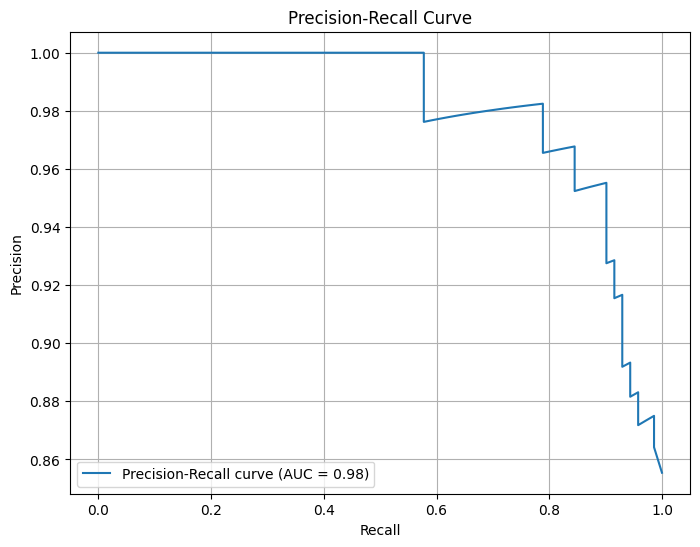

In [156]:
# Get precision-recall curve
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
import matplotlib.pyplot as plt


clf = RandomForestClassifier(max_depth=best_max_depth, max_leaf_nodes=best_max_leaf_node, 
                             min_impurity_decrease=0.01, class_weight='balanced')
clf.fit(X_train, y_train)
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Step 1: Calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Step 2: Calculate average precision score (optional, for reference)
avg_precision = average_precision_score(y_test, y_pred_prob)
print(f'Average Precision Score: {avg_precision:.2f}')

# Step 3: Calculate the area under the precision-recall curve (optional)
pr_auc = auc(recall, precision)
print(f'Precision-Recall AUC: {pr_auc:.2f}')

# Step 4: Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid()
plt.show()


## 3. Adaboost Classifier

In [158]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score
from itertools import product

n_estimators = [50, 100, 150, 200, 250, 300]
learning_rates = [0.01, 0.05, 0.1, 0.5, 1]

best_accuracy = 0
best_model_report = None
best_n_estimator = 0
best_learning_rate = 0


logging.info("=== Adaboost Classifier (using holdout method) ===")
for n_estimator, learning_rate in product(n_estimators, learning_rates):
    clf = AdaBoostClassifier(n_estimators=n_estimator, learning_rate=learning_rate)
    # Train Decision Tree Classifer
    clf = clf.fit(X_train,y_train)
    #Predict the response for test dataset
    predictions = clf.predict(X_test)
    predicted_probas = clf.predict_proba(X_test)
    accuracy = accuracy_score(y_test, predictions)
    
    logging.info(f"n_estimator: {n_estimator} - learning_rate: {learning_rate} - Accuracy: {accuracy}")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_report = classification_report(y_test, predictions)
        best_n_estimator = n_estimator
        best_learning_rate = learning_rate
        
# Print the results
print(f"Best accuracy: {best_accuracy}")
print(f"Best n_estimator: {best_n_estimator}")
print(f"Best learning_rate: {best_learning_rate}")
print("Best model report:")
print(best_model_report)

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarni

Best accuracy: 0.891566265060241
Best n_estimator: 100
Best learning_rate: 1
Best model report:
              precision    recall  f1-score   support

           0       0.60      0.75      0.67        12
           1       0.96      0.92      0.94        71

    accuracy                           0.89        83
   macro avg       0.78      0.83      0.80        83
weighted avg       0.90      0.89      0.90        83



In [159]:
# cross validation
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score
from itertools import product

n_estimators = [50, 100, 150, 200, 250, 300]
learning_rates = [0.01, 0.05, 0.1, 0.5, 1]

best_accuracy = 0
best_n_estimator = 0
best_learning_rate = 0

# Initialize stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

logging.info("=== Adaboost Classifier (using cross-validation method) ===")
for n_estimator, learning_rate in product(n_estimators, learning_rates):
    clf = AdaBoostClassifier(n_estimators=n_estimator, learning_rate=learning_rate)
    # Perform cross-validation and calculate the mean accuracy
    cv_scores = cross_val_score(clf, X, y, cv=skf, scoring='accuracy')
    mean_accuracy = np.mean(cv_scores)
    
    logging.info(f"n_estimator: {n_estimator} - learning_rate: {learning_rate} - Mean CV Accuracy: {mean_accuracy}")
    
    if accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_n_estimator = n_estimator
        best_learning_rate = learning_rate
        
# Train the best model on the entire training data and get the classification report
best_clf = AdaBoostClassifier(n_estimators=best_n_estimator, learning_rate=best_learning_rate)
best_clf.fit(X_train, y_train)
best_predictions = best_clf.predict(X_test)
best_model_report = classification_report(y_test, best_predictions)
    
print(f"Best accuracy: {best_accuracy}")
print(f"Best n_estimator: {best_n_estimator}")
print(f"Best learning_rate: {best_learning_rate}")
print("Best model report:")
print(best_model_report)

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Best accuracy: 0.8985064935064935
Best n_estimator: 50
Best learning_rate: 0.5
Best model report:
              precision    recall  f1-score   support

           0       0.57      0.67      0.62        12
           1       0.94      0.92      0.93        71

    accuracy                           0.88        83
   macro avg       0.76      0.79      0.77        83
weighted avg       0.89      0.88      0.88        83



/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AUC Score: 0.89


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


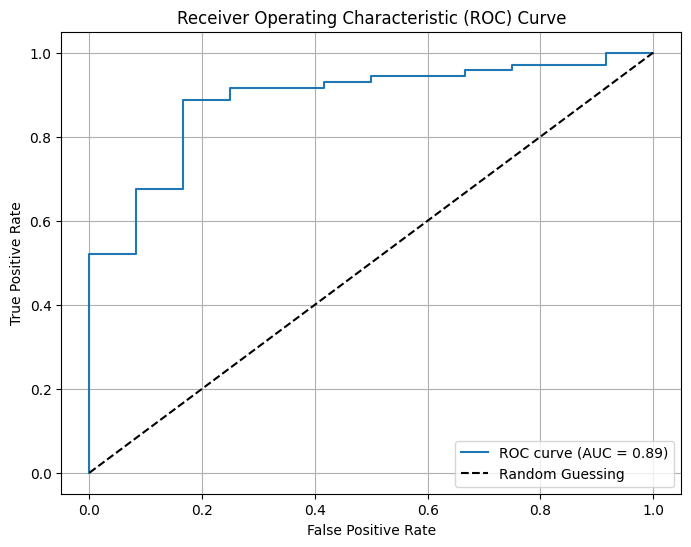

In [165]:
# insert roc curve
# get ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

clf = AdaBoostClassifier(n_estimators=best_n_estimator, learning_rate=best_learning_rate)
clf.fit(X_train, y_train)

# Step 1: Obtain predicted probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Step 2: Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Step 3: Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"AUC Score: {auc_score:.2f}")

# Step 4: Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Average Precision Score: 0.98
Precision-Recall AUC: 0.98


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


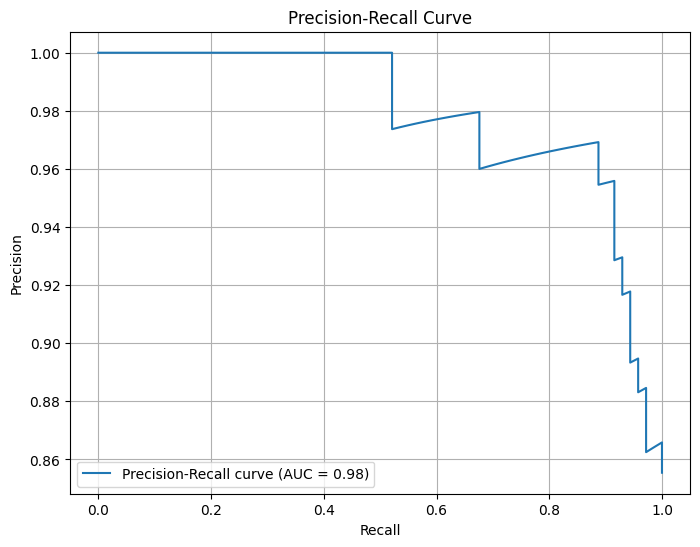

In [166]:
# Get precision-recall curve
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
import matplotlib.pyplot as plt


clf = AdaBoostClassifier(n_estimators=best_n_estimator, learning_rate=best_learning_rate)
clf.fit(X_train, y_train)
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Step 1: Calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Step 2: Calculate average precision score (optional, for reference)
avg_precision = average_precision_score(y_test, y_pred_prob)
print(f'Average Precision Score: {avg_precision:.2f}')

# Step 3: Calculate the area under the precision-recall curve (optional)
pr_auc = auc(recall, precision)
print(f'Precision-Recall AUC: {pr_auc:.2f}')

# Step 4: Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid()
plt.show()


## 4. XGBoost Classifier

In [162]:
%pip install xgboost

  Using cached numpy-1.26.4-cp311-cp311-macosx_11_0_arm64.whl.metadata (114 kB)
Using cached numpy-1.26.4-cp311-cp311-macosx_11_0_arm64.whl (14.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.1
ERROR: Cannot uninstall numpy 2.1.1, RECORD file not found. Hint: The package was installed by brew.

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [163]:
import xgboost as xgb
import multiprocessing
from sklearn.metrics import classification_report, accuracy_score
from itertools import product

n_estimators = [50, 100, 150, 200, 250, 300]
learning_rates = [0.01, 0.05, 0.1, 0.5, 1]
max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

best_accuracy = 0
best_model_report = None
best_n_estimator = 0
best_learning_rate = 0
best_max_depth = 0


logging.info("=== XGBoost Classifier (using holdout method) ===")
for n_estimator, learning_rate, max_depth in product(n_estimators, learning_rates, max_depths):
    clf = xgb.XGBClassifier(n_estimators=n_estimator, learning_rate=learning_rate, max_depth=max_depth)
    # Train Decision Tree Classifer
    clf = clf.fit(X_train,y_train)
    #Predict the response for test dataset
    predictions = clf.predict(X_test)
    predicted_probas = clf.predict_proba(X_test)
    accuracy = accuracy_score(y_test, predictions)
    
    logging.info(f"n_estimator: {n_estimator} - learning_rate: {learning_rate} - max_depth: {max_depth} - Accuracy: {accuracy}")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_report = classification_report(y_test, predictions)
        best_n_estimator = n_estimator
        best_learning_rate = learning_rate
        best_max_depth = max_depth
        
# Print the results
print(f"Best accuracy: {best_accuracy}")
print(f"Best max_depth: {best_max_depth}")
print(f"Best n_estimator: {best_n_estimator}")
print(f"Best learning_rate: {best_learning_rate}")
print("Best model report:")
print(best_model_report)

/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best accuracy: 0.9156626506024096
Best max_depth: 2
Best n_estimator: 100
Best learning_rate: 1
Best model report:
              precision    recall  f1-score   support

           0       0.67      0.83      0.74        12
           1       0.97      0.93      0.95        71

    accuracy                           0.92        83
   macro avg       0.82      0.88      0.85        83
weighted avg       0.93      0.92      0.92        83



In [164]:
# cross validation
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score
from itertools import product

n_estimators = [50, 100, 150, 200, 250, 300]
learning_rates = [0.01, 0.05, 0.1, 0.5, 1]
max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

best_accuracy = 0
best_n_estimator = 0
best_learning_rate = 0
best_max_depth = 0


# Initialize stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

logging.info("=== XGBClassifier Classifier (using cross-validation method) ===")
for n_estimator, learning_rate, max_depth in product(n_estimators, learning_rates, max_depths):
    clf = xgb.XGBClassifier(n_estimators=n_estimator, learning_rate=learning_rate, max_depth=max_depth)
    # Perform cross-validation and calculate the mean accuracy
    cv_scores = cross_val_score(clf, X, y, cv=skf, scoring='accuracy')
    mean_accuracy = np.mean(cv_scores)
    
    logging.info(f"n_estimator: {n_estimator} - learning_rate: {learning_rate} - max_depth: {max_depth} - Accuracy: {mean_accuracy}")
    
    if accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_n_estimator = n_estimator
        best_learning_rate = learning_rate
        best_max_depth = max_depth

# Train the best model on the entire training data and get the classification report
best_clf = xgb.XGBClassifier(n_estimators=best_n_estimator, learning_rate=best_learning_rate, max_depth=best_max_depth)
best_clf.fit(X_train, y_train)
best_predictions = best_clf.predict(X_test)
best_model_report = classification_report(y_test, best_predictions)


print(f"Best accuracy: {best_accuracy}")
print(f"Best n_estimator: {best_n_estimator}")
print(f"Best learning_rate: {best_learning_rate}")
print(f"Best max_depth: {best_max_depth}")
print("Best model report:")
print(best_model_report)

Best accuracy: 0.8985064935064935
Best n_estimator: 50
Best learning_rate: 1
Best max_depth: 1
Best model report:
              precision    recall  f1-score   support

           0       0.56      0.75      0.64        12
           1       0.96      0.90      0.93        71

    accuracy                           0.88        83
   macro avg       0.76      0.83      0.79        83
weighted avg       0.90      0.88      0.89        83



AUC Score: 0.89


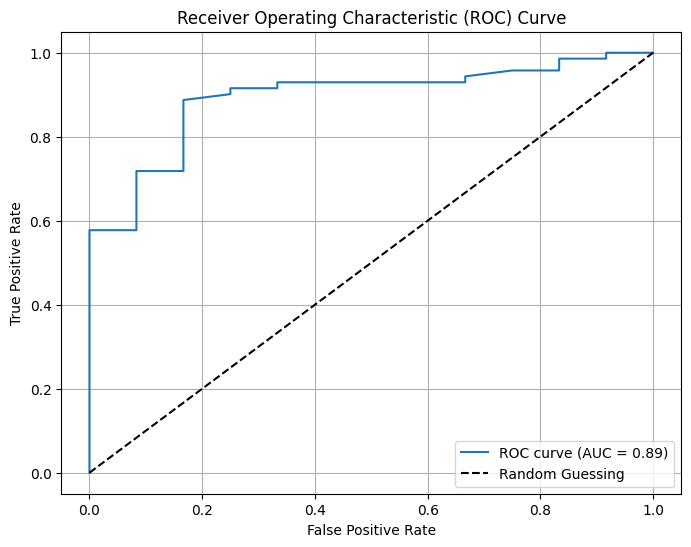

In [167]:
# insert roc curve
# get ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

clf = xgb.XGBClassifier(n_estimators=best_n_estimator, learning_rate=best_learning_rate, max_depth=best_max_depth)
clf.fit(X_train, y_train)

# Step 1: Obtain predicted probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Step 2: Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Step 3: Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"AUC Score: {auc_score:.2f}")

# Step 4: Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
# Get precision-recall curve
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
import matplotlib.pyplot as plt

clf = xgb.XGBClassifier(n_estimators=best_n_estimator, learning_rate=best_learning_rate, max_depth=best_max_depth)
clf.fit(X_train, y_train)
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Step 1: Calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Step 2: Calculate average precision score (optional, for reference)
avg_precision = average_precision_score(y_test, y_pred_prob)
print(f'Average Precision Score: {avg_precision:.2f}')

# Step 3: Calculate the area under the precision-recall curve (optional)
pr_auc = auc(recall, precision)
print(f'Precision-Recall AUC: {pr_auc:.2f}')

# Step 4: Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid()
plt.show()
